#Sprint 7

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

df = pd.read_csv('/datasets/games.csv')

df.head(8)


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E


In [5]:
#Convertimos a minusculas renombrando de mayuscula a minusculas.
df.columns = df.columns.str.lower()

# Converti los tipos de datos
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y', errors='coerce').dt.year
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce')
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
#Se muestran  los valores ausentes
missing_values = df.isnull().sum()
print(missing_values)

# Rellenar valores ausentes
df['critic_score'].fillna(df['critic_score'].median(), inplace=True)  # Mediana es menos sensible a outliers
df['user_score'].fillna(df['user_score'].median(), inplace=True) 

# Manejo de 'TBD'
df['user_score'].replace('tbd', pd.NA, inplace=True)
df.head()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,71.0,7.5,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,NaN


In [7]:
# Calcular ventas totales
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,71.0,7.5,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,NaN,31.38


***Primero importamos las libreria y desues la ruta del datase. year_of_release: Convertido a año para facilitar los datos, critic_score y user_score: Convertidos a numéricos mejor analizis Se convirtio las columnas de mayuscula a minuscula.Se muestran los valores ausentes. Puede ser que los los valores AUSENTES ose allan registrado su fecha de lanzamiento en la base de datos. o tambien que si no se realizaron algunas resenas de algunos juegos. Una de las mejores razones es no dejar nada en blanco porque puede ocasionar erroes al momento de funciones. se observan los vaores ausentes y se llenan con la media para no perder data. Se creo una nueva columna de la ventas totales "tota_sales"

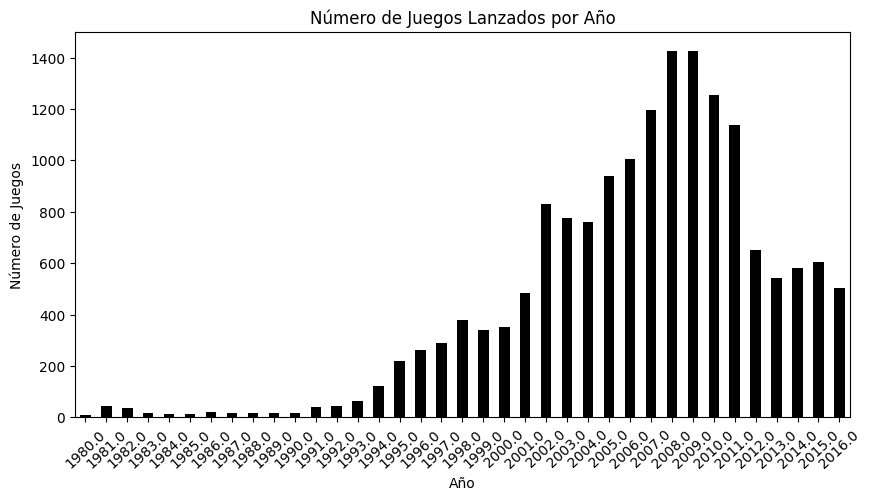

In [8]:
# Contar juegos por año
games_per_year = df['year_of_release'].value_counts().sort_index()

# Visualización
import matplotlib.pyplot as plt

games_per_year.plot(kind='bar', figsize=(10, 5), color='black')
plt.title('Número de Juegos Lanzados por Año')
plt.xlabel('Año')
plt.ylabel('Número de Juegos')
plt.xticks(rotation=43)
plt.show()


Se ve un incremento significativo 2007 y 2008 eso quiere decir la gran lazamiento de inovacion de la industria a compracion de years pasados.

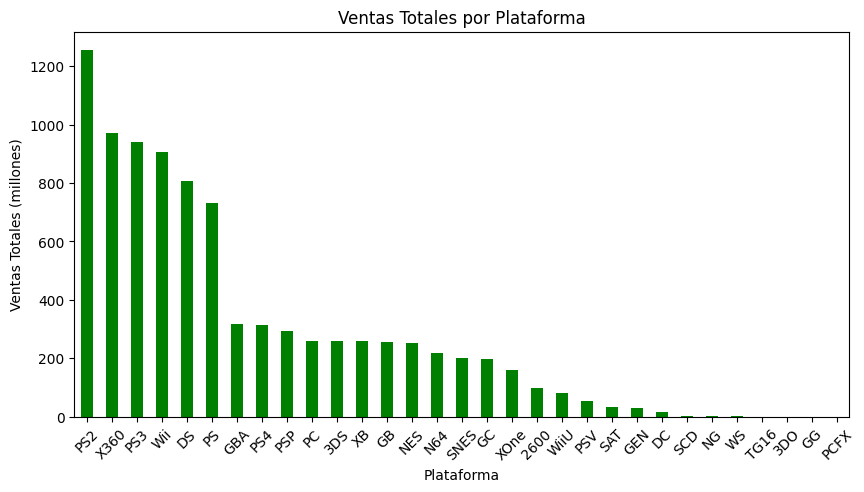

In [9]:
# Ventas totales por plataforma
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Visualización
platform_sales.plot(kind='bar', figsize=(10, 5), color='green')
plt.title('Ventas Totales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.show()


PS2 fue con el de mas ventas totales de ahi x360 conforme pasa el tiempo van creando inovacion el las plataformas 

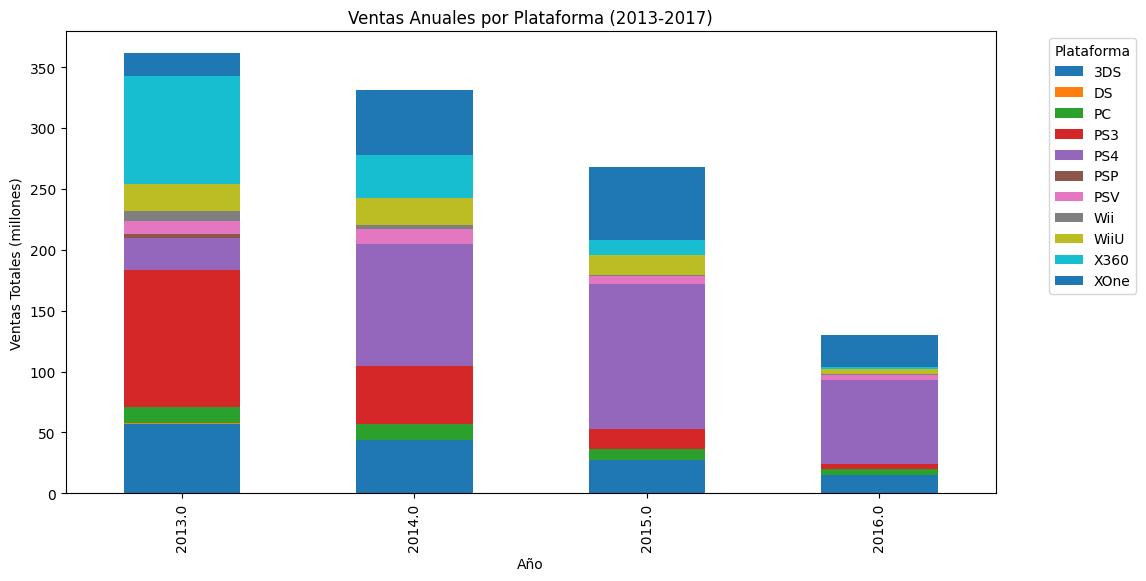

In [12]:
# Los datos para los últimos 5 años de 2013 a 2017
filtered_df = df[df['year_of_release'].between(2013, 2017)]

# Agrupamos por año y plataforma
annual_sales = filtered_df.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Se Grafica
annual_sales.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Ventas Anuales por Plataforma (2013-2017)')
plt.xlabel('Año')
plt.ylabel('Ventas Totales (millones)')
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


En ventas anuales ps4 sobresale pero despues disminuye por la 20212 y de ahi empieza xone su auje ne 21014 de ahi disminuye

In [335]:
# Las plataformas con ventas totales y observar tendencias
recent_years = df[df['year_of_release'] >= 2010]
recent_platform_sales = recent_years.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(recent_platform_sales)


platform
PS3     587.74
X360    550.41
PS4     314.14
3DS     257.81
Wii     222.97
XOne    159.32
DS      123.75
PC      121.96
WiiU     82.19
PSP      64.05
PSV      53.81
PS2       6.09
Name: total_sales, dtype: float64


ps3 Fue la mas vendida eso quiere decir que tre mas inovacion alla en la industria mejor critica y eso aumenta las ventas

In [336]:
# Plataformas lideres
leading_platforms = recent_platform_sales.nlargest(6)
print("Plataformas líderes en ventas:")
print(leading_platforms)


Plataformas líderes en ventas:
platform
PS3     587.74
X360    550.41
PS4     314.14
3DS     257.81
Wii     222.97
XOne    159.32
Name: total_sales, dtype: float64


Ps3 es el lider

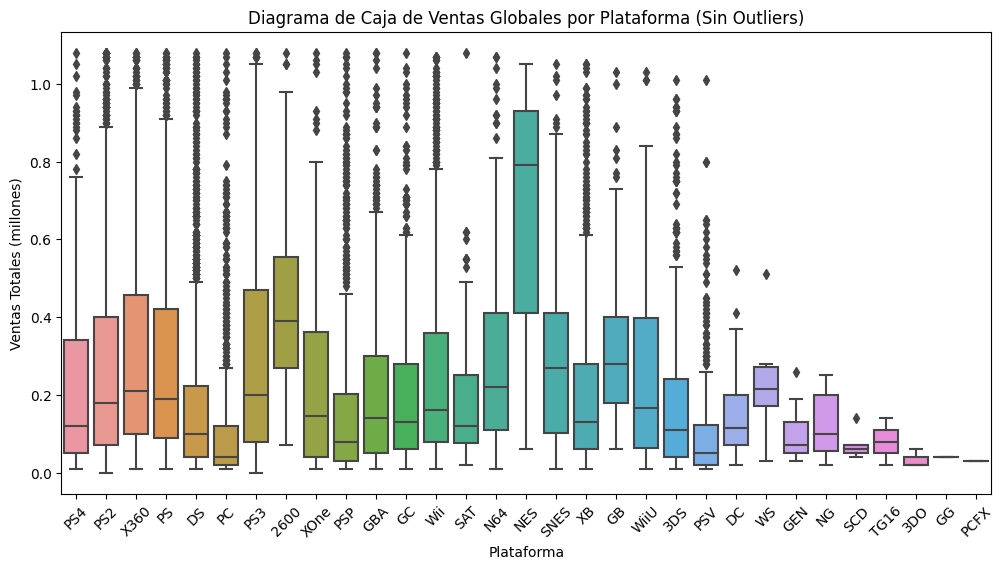

In [17]:
#Se Calcula el IQR para identificar outliers
Q1 = df['total_sales'].quantile(0.25)
Q3 = df['total_sales'].quantile(0.75)
IQR = Q3 - Q1

#Se Definen los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos para eliminar outliers
filtered_df = df[(df['total_sales'] >= lower_bound) & (df['total_sales'] <= upper_bound)]

# Visualización sin outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=filtered_df)
plt.title('Diagrama de Caja de Ventas Globales por Plataforma (Sin Outliers)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.show()


Plataformas simpre varian acorde asu evolucion y critica de los compradores hace que mas se inlinen por cierta plataforma.

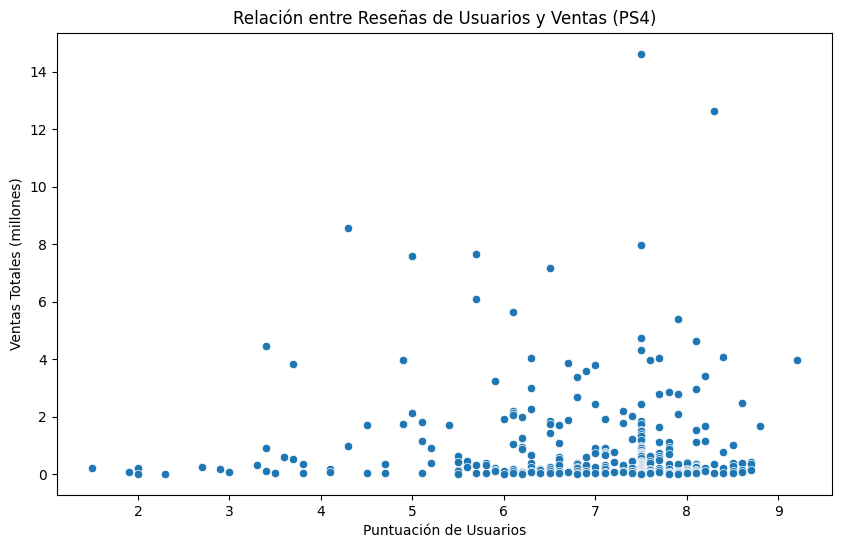

Correlación entre las reseñas de usuarios y las ventas: -0.06275557891282788


In [18]:
ps4_data = df[df['platform'] == 'PS4'].dropna(subset=['user_score', 'total_sales'])
#Grafico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_score', y='total_sales', data=ps4_data)
plt.title('Relación entre Reseñas de Usuarios y Ventas (PS4)')
plt.xlabel('Puntuación de Usuarios')
plt.ylabel('Ventas Totales (millones)')
plt.show()

# La correlación
correlation = ps4_data['user_score'].corr(ps4_data['total_sales'])
print(f'Correlación entre las reseñas de usuarios y las ventas: {correlation}')


Una correlación de aproximadamente -0.063 indica una relación muy débil y negativa entre las reseñas de usuarios y las ventas de los juegos en la plataforma seleccionada, esto se debe posiblemente al marketing o las resenas de los usuarios o la diversidad e los mercados, precios!

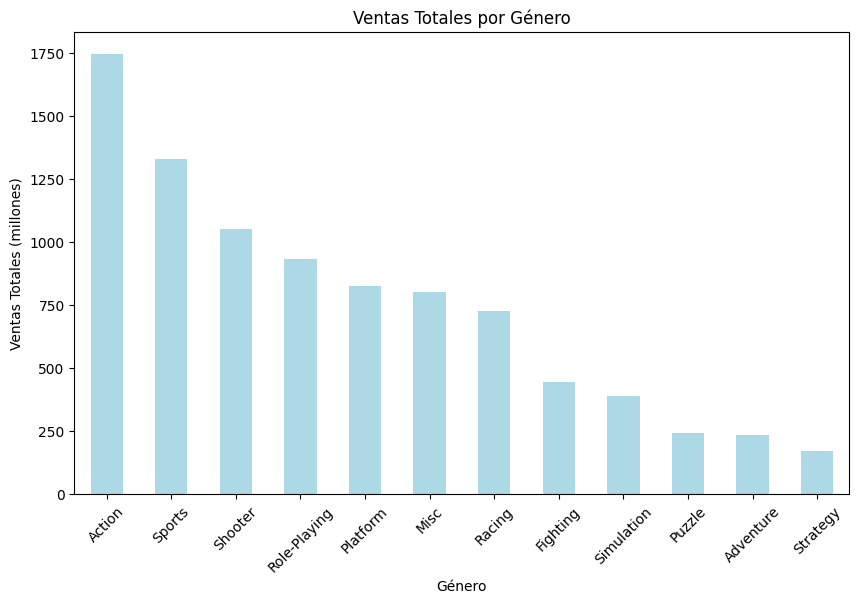

In [19]:
# Se Agrupa por género y se calcular las ventas totales y la cuenta de juegos
genre_sales = df.groupby('genre').agg({'total_sales': 'sum', 'name': 'count'}).rename(columns={'name': 'count'})

# Ordenar por ventas totales
genre_sales = genre_sales.sort_values(by='total_sales', ascending=False)
genre_sales.head(20)


plt.figure(figsize=(10, 6))
genre_sales['total_sales'].plot(kind='bar', color='lightblue')
plt.title('Ventas Totales por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.show()

El genero mas vendido es accion y el ultimo lugar de estrategia las persona sprefieren as accion deportes y de shooters.

In [20]:
 #Plataformas Principales por Región

#Se Calculan las ventas totales por plataforma y región
platform_sales_by_region = {
    'NA': df.groupby('platform')['na_sales'].sum(),
    'EU': df.groupby('platform')['eu_sales'].sum(),
    'JP': df.groupby('platform')['jp_sales'].sum(),
}

# Las 5 plataformas principales para cada región
top_platforms_by_region = {region: sales.nlargest(5) for region, sales in platform_sales_by_region.items()}

# se imprime
for region, platforms in top_platforms_by_region.items():
    print(f"\nCinco plataformas principales en {region}:")
    print(platforms)



Cinco plataformas principales en NA:
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Cinco plataformas principales en EU:
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Cinco plataformas principales en JP:
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


La diferencia en las preferencias de plataformas entre regiones. Microsoft tiene una fuerte presencia en NA, Sony domina en Europa.
Consolas Portátiles: En Japón, la popularidad de las consolas portátiles, como el DS, es notable, a diferencia de la tendencia hacia las consolas de sobremesa en NA y EU.

In [21]:
# Los cinco géneros principales por región
generos_regiones = {
    'NA': df.groupby('genre')['na_sales'].sum().nlargest(5),
    'EU': df.groupby('genre')['eu_sales'].sum().nlargest(5),
    'JP': df.groupby('genre')['jp_sales'].sum().nlargest(5),
}

for region, generos in generos_regiones.items():
    print(f"Géneros principales en {region}:")
    print(generos)


Géneros principales en NA:
genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64
Géneros principales en EU:
genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64
Géneros principales en JP:
genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


In [22]:
# Ventas totales por clasificación de ESRB y región
esrb_sales_by_region = {
    'NA': df.groupby('rating')['na_sales'].sum(),
    'EU': df.groupby('rating')['eu_sales'].sum(),
    'JP': df.groupby('rating')['jp_sales'].sum(),
}

# Mostrar resultados
for region, sales in esrb_sales_by_region.items():
    print(f"\nVentas totales por clasificación ESRB en {region}:")
    print(sales)



Ventas totales por clasificación ESRB en NA:
rating
AO         1.26
E       1292.99
E10+     353.32
EC         1.53
K-A        2.56
M        748.48
RP         0.00
T        759.75
Name: na_sales, dtype: float64

Ventas totales por clasificación ESRB en EU:
rating
AO        0.61
E       710.25
E10+    188.52
EC        0.11
K-A       0.27
M       483.97
RP        0.08
T       427.03
Name: eu_sales, dtype: float64

Ventas totales por clasificación ESRB en JP:
rating
AO        0.00
E       198.11
E10+     40.20
EC        0.00
K-A       1.46
M        64.24
RP        0.00
T       151.40
Name: jp_sales, dtype: float64


Géneros de Acción y Deportes: Son fuertes en NA, pero no dminan en Jp. Quiere decir que  los jugadores japoneses pueden preferir  como los RPG.
RPG en Japón: son mas las preferencias , a diferencia de NA y EU, donde la acción y los deportes son mejor valorados.
Géneros Regionales:
Racing en Europa: Son mas populares los juegos de carreras en EU tiene un mercado con intereses diferentes en comparación con NA y JP.
Misc: En todas las regiones, indica un interés variado, lo que sugiere que hay espacio para innovaciones en el desarrollo de juegos.
Las diferencias en las ventas por clasificación indican que las compañías de videojuegos deben priorisar sus estrategias de desarrollo y marketing a las preferencias culturales de cada región.

In [27]:

# Filtrar las calificaciones para PS4 y PC
ps4_scores = df[df['platform'] == 'PS4']['user_score']
pc_scores = df[df['platform'] == 'PC']['user_score']

# Realizar la prueba de Levene para comprobar la igualdad de varianzas
levene_stat, levene_p_value = stats.levene(pc_scores.dropna(), ps4_scores.dropna())

alpha = 0.05
print(f"Levene statistic: {levene_stat}, P-value: {levene_p_value}")

# Determinar si se pueden considerar varianzas iguales
equal_var = levene_p_value > alpha

Levene statistic: 6.5039298409195325, P-value: 0.010872150926917424


In [29]:
t_stat_genre, p_value_genre = stats.ttest_ind(accion_scores.dropna(), deportes_scores.dropna(), equal_var=equal_var_genre)

if p_value_genre < alpha:
    print("Rechazamos H0: las calificaciones son diferentes entre Action y Sports.")
else:
    print("No se puede rechazar H0: las calificaciones son iguales entre Action y Sports.")

No se puede rechazar H0: las calificaciones son iguales entre Action y Sports.


Esto indica que no hay diferencias significativas en las calificaciones promedio de los usuarios para los géneros de Acción y Deportes.aunque estadísticamente no se encontraron diferencias, esto no significa que las experiencias de los jugadores sean idénticas el contenido del juego, la comunidad de jugadores y el marketing pueden influir en las percepciones de cada plataforma y género.



#Proyecto sprint 7

En este proyecto, hemos analizado un conjunto de datos de videojuegos para identificar patrones que determinen el éxito de un juego. El análisis incluyó la evaluación de plataformas, géneros, clasificaciones de ESRB y las calificaciones de usuarios y críticos.

Lanzamientos por Año:
   - Observamos que hubo cambios en el número de lanzamientos de videojuegos a lo largo de los años,y como cambia de popularidad y cambios en la industria.

Ventas por Plataforma:
   - Las plataformas más vendidas en Norteamérica fueron "Xbox 360", "PS2", y "Wii". Esto indica que estas plataformas tuvieron una gran acogida en su tiempo. En cambio, plataformas más recientes como "Xbox One" no presentaron datos significativos, lo que podría ser un indicativo de su desempeño limitado en el mercado.

Géneros de Videojuegos:
   - Los géneros más rentables en Norteamérica fueron "Action" y "Sports", mientras que en Japón, el género "Role-Playing" dominó. Esto muestra diferencias culturales en las preferencias de videojuegos.

Clasificaciones de ESRB:
   - Las ventas varían significativamente según la clasificación ESRB. Las calificaciones "E" (Everyone) y "M" (Mature) mostraron ventas considerablemente altas, mientras que las clasificaciones como "AO" (Adults Only) apenas lograron ventas, lo que refleja la aceptación del público.

Correlación entre Reseñas y Ventas:
   - La correlación entre las reseñas de usuarios y las ventas fue baja, lo que sugiere que las ventas no dependen únicamente de las calificaciones de los usuarios. Es posible que otros factores, como la publicidad o la franquicia del juego, influyan más en las ventas.

Hipotesis: 
- Se intentó probar si las calificaciones promedio de los usuarios para "Xbox One" y "PC" eran las mismas, pero debido a la ausencia de datos para Xbox One, no se pudo realizar esta comparación.


Limitaciones:

- Los datos de 2016 son incompletos, lo que puede influir en la validez de algunas de las conclusiones. Además, la falta de datos para plataformas como Xbox One limitó el análisis.

Conclucion:

Este proyecto demuestra la importancia de analizar datos históricos para predecir tendencias futuras en la industria de los videojuegos. Los hallazgos pueden ayudar a las empresas a identificar oportunidades en el mercado y a orientar sus estrategias de marketing para juegos nuevos.

A medida que se acumulan más datos, sería útil realizar análisis más profundos, que puedan mejorar la planificación de lanzamientos futuros.



<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera. Además, el análisis explorario de datos fue completo al mostrar resultados relevantes que pueden ser de mucha utilidad para la toma de decisiones y desarrollaste las pruebas de hipótesis de una buena manera. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:



*  Considerar eliminar registros atipicos que puedan sesgar nuestros resultados. 
    
*  Considerar desarrollar un análisis para comprobar los supuestos de la prueba de hipótesis (varianzas iguales)
    
</div>